# Loading libraries

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Importing data

In [52]:
FDI2 = pd.read_excel('FDI2.xlsx')

# Exploring data

In [53]:
FDI2.head()

,payscode,codepays,Année,ide,toc,tcr,fbcf,climatdaffaire,scoreeasedoingbusiness,caff,edb,crp,BUF,invf,finfree,CM
0,BGD,1,2004,4.489054e+08,38953960.63,59.512658,18286460936,47.380000,70.0,63.380000,66.00,0.11,55.0,50.0,70.0,10.671695
1,BGD,1,2005,7.605043e+08,51935441.53,64.327475,20071885132,42.400000,70.0,70.066667,61.30,0.06,55.0,50.0,70.0,4.751541
2,BGD,1,2006,4.565232e+08,59714312.41,68.933233,22056583775,50.916667,70.0,72.800000,63.90,-0.07,70.5,70.0,70.0,5.361124
3,BGD,1,2007,6.510297e+08,64798835.89,68.874875,23632938587,40.266667,70.0,69.450000,65.36,-0.18,70.3,60.0,60.0,10.969166
4,BGD,1,2008,1.328423e+09,62836842.93,68.598275,25952536543,36.650000,70.0,71.450000,67.00,-0.25,68.4,60.0,60.0,12.791560


In [54]:
FDI2.tail()

,payscode,codepays,Année,ide,toc,tcr,fbcf,climatdaffaire,scoreeasedoingbusiness,caff,edb,crp,BUF,invf,finfree,CM
325,TUR,22,2014,1.333700e+10,35361166.84,2.188542,292106000000,68.933333,83.400,NaN,NaN,NaN,NaN,NaN,NaN,23.405529
326,TUR,22,2015,1.927400e+10,34868314.46,2.720009,319228000000,67.200000,77.500,NaN,NaN,NaN,NaN,NaN,NaN,21.851067
327,TUR,22,2016,1.395000e+10,34681331.76,3.020135,326401000000,67.483333,73.980,NaN,NaN,NaN,NaN,NaN,NaN,19.750290
328,TUR,22,2017,1.154600e+10,34774823.11,3.648133,353331000000,66.566667,72.900,NaN,NaN,NaN,NaN,NaN,NaN,26.486011
329,TUR,22,2018,1.306100e+10,34728077.44,4.828370,351244000000,66.133333,73.875,NaN,NaN,NaN,NaN,NaN,NaN,19.176135


# rename columns

In [55]:
FDI2.rename(columns = {'payscode': 'id_countries', 'Année': 'year' , 'codepays': 'ID_countries' , 'ide' : 'fdi', 'toc' : 'commercial_opening_rate', 'CM' : 'Stock_Market'}, inplace = True)

In [56]:
FDI2.rename(columns = {'tcr' : 'Exchange_rate' , 'fbcf' : 'gross_fixed_capital_formation' ,  'climatdaffaire' : 'business_climate',   'cm' : 'stock_market'}, inplace = True)

# Convert ID_countries and year to string

In [57]:
FDI2['ID_countries'] = FDI2['ID_countries'].astype('string')
FDI2.dtypes

id_countries                      object
ID_countries                      string
year                               int64
fdi                              float64
commercial_opening_rate          float64
Exchange_rate                    float64
gross_fixed_capital_formation      int64
business_climate                 float64
scoreeasedoingbusiness           float64
caff                             float64
edb                              float64
crp                              float64
BUF                              float64
invf                             float64
finfree                          float64
Stock_Market                     float64
dtype: object

In [58]:
FDI2['year'] = FDI2['year'].astype('string')
FDI2.dtypes

id_countries                      object
ID_countries                      string
year                              string
fdi                              float64
commercial_opening_rate          float64
Exchange_rate                    float64
gross_fixed_capital_formation      int64
business_climate                 float64
scoreeasedoingbusiness           float64
caff                             float64
edb                              float64
crp                              float64
BUF                              float64
invf                             float64
finfree                          float64
Stock_Market                     float64
dtype: object

# convert year to datetime

In [59]:
FDI2['year'] = pd.to_datetime(FDI2['year'])
FDI2.dtypes

id_countries                             object
ID_countries                             string
year                             datetime64[ns]
fdi                                     float64
commercial_opening_rate                 float64
Exchange_rate                           float64
gross_fixed_capital_formation             int64
business_climate                        float64
scoreeasedoingbusiness                  float64
caff                                    float64
edb                                     float64
crp                                     float64
BUF                                     float64
invf                                    float64
finfree                                 float64
Stock_Market                            float64
dtype: object

In [60]:
FDI2.head()

,id_countries,ID_countries,year,fdi,commercial_opening_rate,Exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,caff,edb,crp,BUF,invf,finfree,Stock_Market
0,BGD,1,2004-01-01,4.489054e+08,38953960.63,59.512658,18286460936,47.380000,70.0,63.380000,66.00,0.11,55.0,50.0,70.0,10.671695
1,BGD,1,2005-01-01,7.605043e+08,51935441.53,64.327475,20071885132,42.400000,70.0,70.066667,61.30,0.06,55.0,50.0,70.0,4.751541
2,BGD,1,2006-01-01,4.565232e+08,59714312.41,68.933233,22056583775,50.916667,70.0,72.800000,63.90,-0.07,70.5,70.0,70.0,5.361124
3,BGD,1,2007-01-01,6.510297e+08,64798835.89,68.874875,23632938587,40.266667,70.0,69.450000,65.36,-0.18,70.3,60.0,60.0,10.969166
4,BGD,1,2008-01-01,1.328423e+09,62836842.93,68.598275,25952536543,36.650000,70.0,71.450000,67.00,-0.25,68.4,60.0,60.0,12.791560


I decided to drop the following columns because of ...

In [61]:
FDI3= FDI2.drop(['caff', 'edb', 'crp', 'ID_countries', 'Exchange_rate' ], axis=1)

In [62]:
display (FDI3)

,id_countries,year,fdi,commercial_opening_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,BUF,invf,finfree,Stock_Market
0,BGD,2004-01-01,4.489054e+08,38953960.63,18286460936,47.380000,70.000,55.0,50.0,70.0,10.671695
1,BGD,2005-01-01,7.605043e+08,51935441.53,20071885132,42.400000,70.000,55.0,50.0,70.0,4.751541
2,BGD,2006-01-01,4.565232e+08,59714312.41,22056583775,50.916667,70.000,70.5,70.0,70.0,5.361124
3,BGD,2007-01-01,6.510297e+08,64798835.89,23632938587,40.266667,70.000,70.3,60.0,60.0,10.969166
4,BGD,2008-01-01,1.328423e+09,62836842.93,25952536543,36.650000,70.000,68.4,60.0,60.0,12.791560
...,...,...,...,...,...,...,...,...,...,...,...
325,TUR,2014-01-01,1.333700e+10,35361166.84,292106000000,68.933333,83.400,NaN,NaN,NaN,23.405529
326,TUR,2015-01-01,1.927400e+10,34868314.46,319228000000,67.200000,77.500,NaN,NaN,NaN,21.851067
327,TUR,2016-01-01,1.395000e+10,34681331.76,326401000000,67.483333,73.980,NaN,NaN,NaN,19.750290
328,TUR,2017-01-01,1.154600e+10,34774823.11,353331000000,66.566667,72.900,NaN,NaN,NaN,26.486011


# lower case the variables

In [63]:
FDI3.columns = list(map(lambda x: x.lower(), FDI3.columns))
FDI3.columns.unique()

Index(['id_countries', 'year', 'fdi', 'commercial_opening_rate',
       'gross_fixed_capital_formation', 'business_climate',
       'scoreeasedoingbusiness', 'buf', 'invf', 'finfree', 'stock_market'],
      dtype='object')

# exploring the data afer modification

In [64]:
FDI3.shape

(330, 11)

In [65]:
FDI3.dtypes

id_countries                             object
year                             datetime64[ns]
fdi                                     float64
commercial_opening_rate                 float64
gross_fixed_capital_formation             int64
business_climate                        float64
scoreeasedoingbusiness                  float64
buf                                     float64
invf                                    float64
finfree                                 float64
stock_market                            float64
dtype: object

In [66]:
FDI3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   id_countries                   330 non-null    object        
 1   year                           330 non-null    datetime64[ns]
 2   fdi                            330 non-null    float64       
 3   commercial_opening_rate        330 non-null    float64       
 4   gross_fixed_capital_formation  330 non-null    int64         
 5   business_climate               330 non-null    float64       
 6   scoreeasedoingbusiness         330 non-null    float64       
 7   buf                            165 non-null    float64       
 8   invf                           165 non-null    float64       
 9   finfree                        165 non-null    float64       
 10  stock_market                   330 non-null    float64       
dtypes: datetime64[ns](1

In [67]:
list (FDI3 ['fdi'].unique())

[448905400.7,
 760504265.8,
 456523167.7,
 651029738.1,
 1328422987.0,
 901286583.1,
 1232258247.0,
 1264725163.0,
 1584403460.0,
 2602962095.0,
 2539190940.0,
 2831152765.0,
 2332724781.0,
 1810395804.0,
 2940222420.0,
 3072550962.0,
 4098122931.0,
 7874476255.0,
 13875270457.0,
 10296720634.0,
 3896664559.0,
 1842900000.0,
 2103810000.0,
 1788110000.0,
 1989040000.0,
 1093600000.0,
 2609370000.0,
 1562800000.0,
 2020340000.0,
 1222580000.0,
 18181190855.0,
 15459981604.0,
 19378093068.0,
 44579492464.0,
 50716402711.0,
 31480932200.0,
 82389933624.0,
 102427000000.0,
 92568379495.0,
 75211028087.0,
 87713987797.0,
 60334050668.0,
 73377909022.0,
 68885072606.0,
 78162572753.0,
 68117272181.0,
 104109000000.0,
 124082000000.0,
 156249000000.0,
 171535000000.0,
 131057000000.0,
 243703000000.0,
 280072000000.0,
 241214000000.0,
 290928000000.0,
 268097000000.0,
 242489000000.0,
 174750000000.0,
 166084000000.0,
 203492000000.0,
 881851385.0,
 1156000000.0,
 1841000000.0,
 1686736540.0,

In [68]:
FDI3 ['fdi'].unique()

array([ 4.48905401e+08,  7.60504266e+08,  4.56523168e+08,  6.51029738e+08,
        1.32842299e+09,  9.01286583e+08,  1.23225825e+09,  1.26472516e+09,
        1.58440346e+09,  2.60296210e+09,  2.53919094e+09,  2.83115276e+09,
        2.33272478e+09,  1.81039580e+09,  2.94022242e+09,  3.07255096e+09,
        4.09812293e+09,  7.87447626e+09,  1.38752705e+10,  1.02967206e+10,
        3.89666456e+09,  1.84290000e+09,  2.10381000e+09,  1.78811000e+09,
        1.98904000e+09,  1.09360000e+09,  2.60937000e+09,  1.56280000e+09,
        2.02034000e+09,  1.22258000e+09,  1.81811909e+10,  1.54599816e+10,
        1.93780931e+10,  4.45794925e+10,  5.07164027e+10,  3.14809322e+10,
        8.23899336e+10,  1.02427000e+11,  9.25683795e+10,  7.52110281e+10,
        8.77139878e+10,  6.03340507e+10,  7.33779090e+10,  6.88850726e+10,
        7.81625728e+10,  6.81172722e+10,  1.04109000e+11,  1.24082000e+11,
        1.56249000e+11,  1.71535000e+11,  1.31057000e+11,  2.43703000e+11,
        2.80072000e+11,  

# cheking missing values

In [69]:
FDI3.shape[0]

330

In [70]:
FDI3.isna().sum()/FDI3.shape[0]*100

id_countries                      0.0
year                              0.0
fdi                               0.0
commercial_opening_rate           0.0
gross_fixed_capital_formation     0.0
business_climate                  0.0
scoreeasedoingbusiness            0.0
buf                              50.0
invf                             50.0
finfree                          50.0
stock_market                      0.0
dtype: float64

### Replacing with knn imputer

In [71]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(FDI3.drop(columns=['year','id_countries','fdi']))
imputed_df = pd.DataFrame(imputed, columns=(FDI3.drop(columns=['year','id_countries','fdi']).columns))
FDI3_KNN = pd.concat([imputed_df, FDI3[['year','id_countries','fdi']]], axis = 1)

In [72]:
FDI3_KNN

,commercial_opening_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,year,id_countries,fdi
0,38953960.63,1.828646e+10,47.380000,70.000,55.000000,50.000000,70.000000,10.671695,2004-01-01,BGD,4.489054e+08
1,51935441.53,2.007189e+10,42.400000,70.000,55.000000,50.000000,70.000000,4.751541,2005-01-01,BGD,7.605043e+08
2,59714312.41,2.205658e+10,50.916667,70.000,70.500000,70.000000,70.000000,5.361124,2006-01-01,BGD,4.565232e+08
3,64798835.89,2.363294e+10,40.266667,70.000,70.300000,60.000000,60.000000,10.969166,2007-01-01,BGD,6.510297e+08
4,62836842.93,2.595254e+10,36.650000,70.000,68.400000,60.000000,60.000000,12.791560,2008-01-01,BGD,1.328423e+09
...,...,...,...,...,...,...,...,...,...,...,...
325,35361166.84,2.921060e+11,68.933333,83.400,63.800000,56.666667,53.333333,23.405529,2014-01-01,TUR,1.333700e+10
326,34868314.46,3.192280e+11,67.200000,77.500,63.800000,56.666667,50.000000,21.851067,2015-01-01,TUR,1.927400e+10
327,34681331.76,3.264010e+11,67.483333,73.980,65.733333,70.000000,63.333333,19.750290,2016-01-01,TUR,1.395000e+10
328,34774823.11,3.533310e+11,66.566667,72.900,57.166667,40.000000,36.666667,26.486011,2017-01-01,TUR,1.154600e+10


# Replacing the NAN values by the median 


In [73]:
# FDI3[(FDI3['buf'].isna() == True) & (FDI3['invf'].isna()==True) & (FDI3['finfree'].isna()==True)]
# display (FDI3)

In [74]:
# FDI3['buf'].fillna(FDI3['buf'].median(), inplace=True)

In [75]:
# display(FDI3)

In [76]:
# FDI3['invf'].fillna(FDI3['invf'].median(), inplace=True)

In [77]:
# FDI3['finfree'].fillna(FDI3['finfree'].median(), inplace=True)

# Check again the missing values

In [78]:
FDI3_KNN.isna().sum()

commercial_opening_rate          0
gross_fixed_capital_formation    0
business_climate                 0
scoreeasedoingbusiness           0
buf                              0
invf                             0
finfree                          0
stock_market                     0
year                             0
id_countries                     0
fdi                              0
dtype: int64

we have here a clean data

# describing the data

In [79]:
FDI3_KNN.describe().T

,count,mean,std,min,25%,50%,75%,max
commercial_opening_rate,330.0,6.454303e+07,1.170231e+08,-6.412492e-01,1.577948e+07,3.510331e+07,6.330626e+07,7.038409e+08
gross_fixed_capital_formation,330.0,2.416401e+11,6.508859e+11,2.625409e+09,2.613547e+10,5.002675e+10,1.882652e+11,4.414250e+12
business_climate,330.0,5.992981e+01,8.639142e+00,3.378333e+01,5.419167e+01,5.926667e+01,6.659167e+01,7.495000e+01
scoreeasedoingbusiness,330.0,6.275875e+01,1.065464e+01,2.610000e+01,5.577375e+01,6.330000e+01,7.081500e+01,8.610000e+01
buf,330.0,6.837566e+01,9.082720e+00,4.000000e+01,6.283333e+01,6.873333e+01,7.379167e+01,8.780000e+01
invf,330.0,5.115657e+01,2.180826e+01,0.000000e+00,4.666667e+01,5.333333e+01,6.666667e+01,9.000000e+01
finfree,330.0,4.773737e+01,1.707598e+01,1.000000e+01,4.000000e+01,5.000000e+01,6.000000e+01,7.000000e+01
stock_market,330.0,4.147970e+01,3.298583e+01,5.339774e-02,1.847838e+01,3.291624e+01,5.383899e+01,1.680671e+02
fdi,330.0,1.828205e+10,4.312849e+10,-5.377929e+08,1.818047e+09,4.576957e+09,1.326800e+10,2.909280e+11


# number and object

In [80]:
numericals = FDI3_KNN.select_dtypes(np.number)
display(numericals.head())
categoricals = FDI3_KNN.select_dtypes(object)
display(categoricals.head())

,commercial_opening_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi
0,38953960.63,1.828646e+10,47.380000,70.0,55.0,50.0,70.0,10.671695,4.489054e+08
1,51935441.53,2.007189e+10,42.400000,70.0,55.0,50.0,70.0,4.751541,7.605043e+08
2,59714312.41,2.205658e+10,50.916667,70.0,70.5,70.0,70.0,5.361124,4.565232e+08
3,64798835.89,2.363294e+10,40.266667,70.0,70.3,60.0,60.0,10.969166,6.510297e+08
4,62836842.93,2.595254e+10,36.650000,70.0,68.4,60.0,60.0,12.791560,1.328423e+09


,id_countries
0,BGD
1,BGD
2,BGD
3,BGD
4,BGD


# Use seaborn library to construct distribution plots for the numerical variables

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


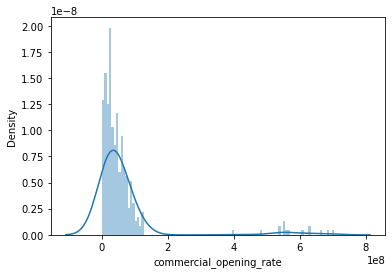

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


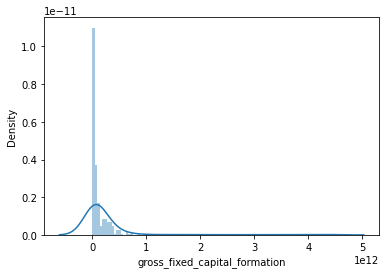

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


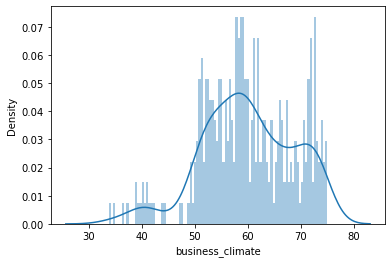

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


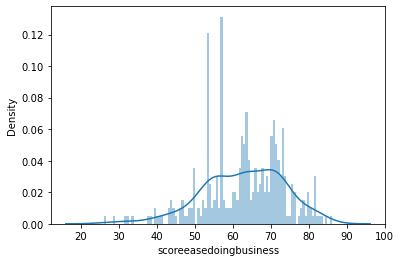

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


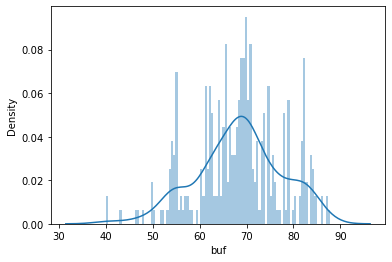

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


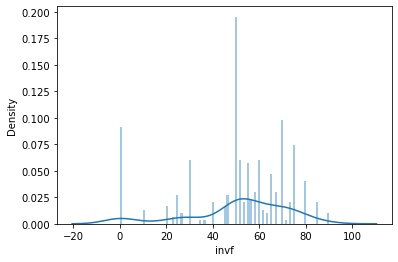

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


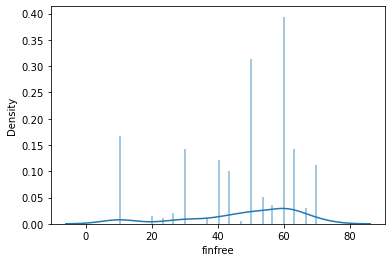

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


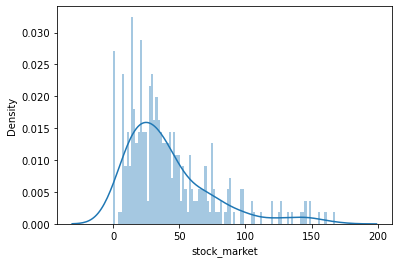

C:\Users\NON\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


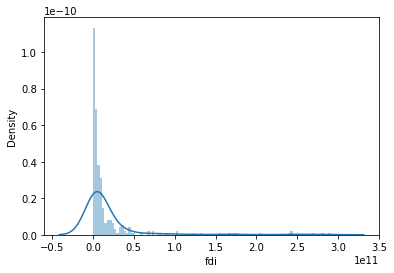

In [81]:
for col in numericals:
     sns.distplot(numericals[col],bins= 100)
     plt.show()

# plotting 

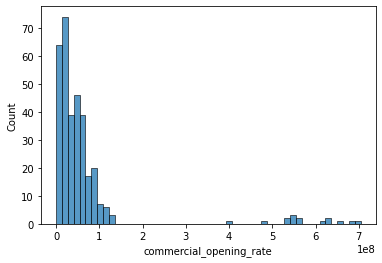

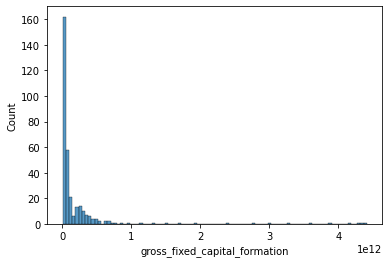

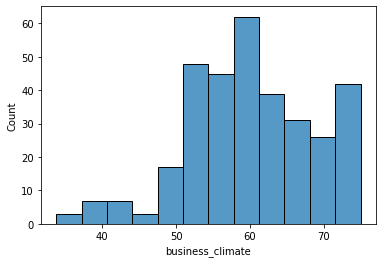

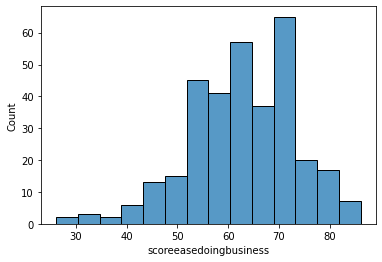

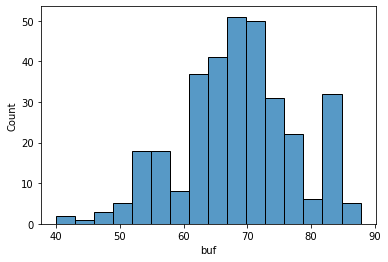

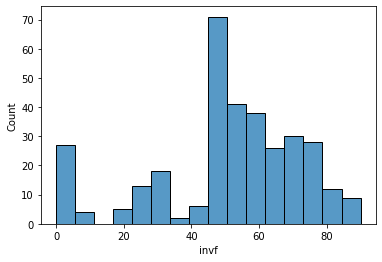

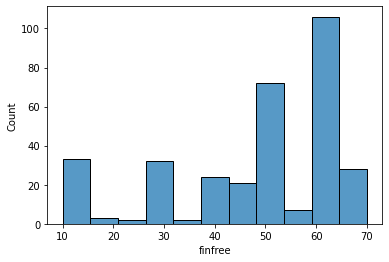

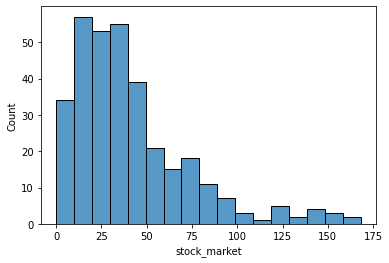

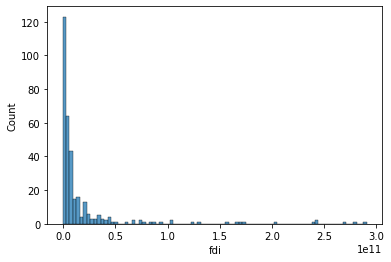

In [82]:
import matplotlib.pyplot as plt
def numericals_plot(df):
    for i in df.columns:
        sns.histplot(x=i, data = df);
        plt.show()
    return
    
numericals_plot(numericals)

In [83]:
#numeric_FDI3

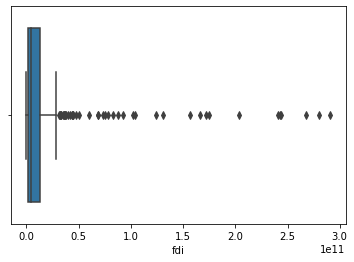

In [84]:
sns.boxplot(x=numericals['fdi'])
plt.show()

In [85]:
iqr = np.percentile(numericals['fdi'],75) - np.percentile(numericals['fdi'],25)
upper_limit = np.percentile(numericals['fdi'],75) + 1.5*iqr
lower_limit = np.percentile(numericals['fdi'],25) - 1.5*iqr

In [86]:
numeric_FDI3 = numericals[(numericals['fdi']>lower_limit) & (numericals['fdi']<upper_limit)]

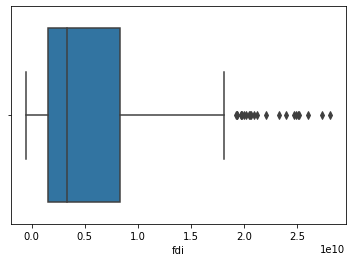

In [87]:
sns.boxplot(x=numeric_FDI3['fdi'])
plt.show()

### Logaritmic transformation

In [88]:
# numeric_FDI3['fdi_log'] = np.log(numeric_FDI3['fdi'])

In [89]:
numeric_FDI3.head()

,commercial_opening_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi
0,38953960.63,1.828646e+10,47.380000,70.0,55.0,50.0,70.0,10.671695,4.489054e+08
1,51935441.53,2.007189e+10,42.400000,70.0,55.0,50.0,70.0,4.751541,7.605043e+08
2,59714312.41,2.205658e+10,50.916667,70.0,70.5,70.0,70.0,5.361124,4.565232e+08
3,64798835.89,2.363294e+10,40.266667,70.0,70.3,60.0,60.0,10.969166,6.510297e+08
4,62836842.93,2.595254e+10,36.650000,70.0,68.4,60.0,60.0,12.791560,1.328423e+09


# power transormation

Check if any of the log transformations changes the result.

In [90]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(numericals)
numeric_FDI3 = pd.DataFrame(pt.transform(numericals), columns = numericals.columns  )
numeric_FDI3.head()

,commercial_opening_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi
0,0.091316,-0.774379,-1.417695,0.661596,-1.440617,-0.106297,1.591057,-1.081706,-0.444693
1,0.305318,-0.707284,-1.895417,0.661596,-1.440617,-0.106297,1.591057,-1.580889,-0.431908
2,0.414890,-0.639883,-1.055946,0.661596,0.198081,0.896537,1.591057,-1.517545,-0.444369
3,0.480856,-0.590864,-2.088493,0.661596,0.175398,0.387938,0.742700,-1.061439,-0.436306
4,0.455876,-0.524810,-2.399586,0.661596,-0.038130,0.387938,0.742700,-0.943724,-0.410158


In [91]:
# numeric_FDI3 = FDI3.apply(lambda x: np.log(x) if np.issubdtype(x.dtype, np.number) else x)

In [92]:
numeric_FDI3.describe().T

,count,mean,std,min,25%,50%,75%,max
commercial_opening_rate,330.0,-7.175447e-17,1.001519,-2.726421,-0.488424,0.017606,0.461905,3.148435
gross_fixed_capital_formation,330.0,4.642751e-16,1.001519,-2.293179,-0.519930,-0.075541,0.762421,2.431483
business_climate,330.0,1.685520e-16,1.001519,-2.631364,-0.704674,-0.130020,0.762803,1.870386
scoreeasedoingbusiness,330.0,2.462677e-16,1.001519,-2.735960,-0.716744,-0.019406,0.748255,2.524387
buf,330.0,-6.546952e-16,1.001519,-2.780774,-0.643083,-0.000925,0.576968,2.303536
invf,330.0,6.341728e-17,1.001519,-2.198074,-0.267474,0.056725,0.725522,1.950404
finfree,330.0,2.714159e-16,1.001519,-1.879919,-0.647929,-0.005062,0.742700,1.591057
stock_market,330.0,-1.147230e-16,1.001519,-2.359208,-0.629804,-0.033728,0.591233,2.573010
fdi,330.0,5.744563e-17,1.001519,-3.671186,-0.392375,-0.300387,-0.045516,5.781305


# PLOTTING with transf


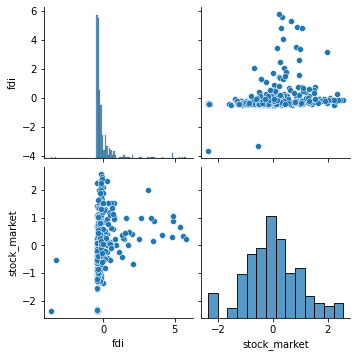

In [93]:
import seaborn as sns
sns.pairplot(numeric_FDI3[['fdi','stock_market' ]])


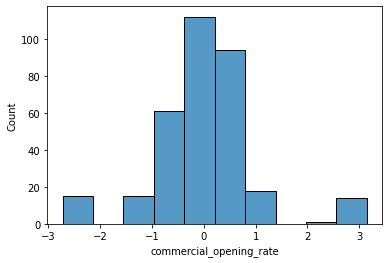

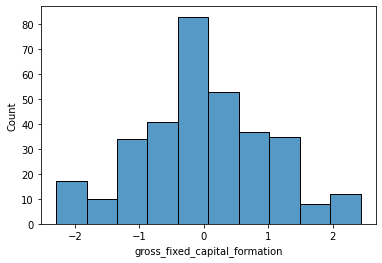

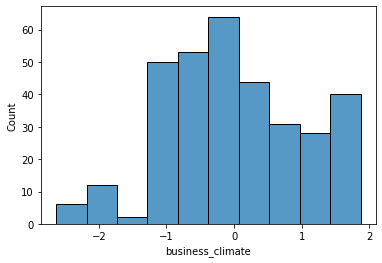

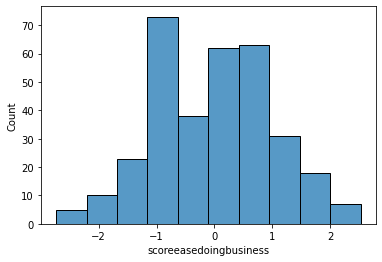

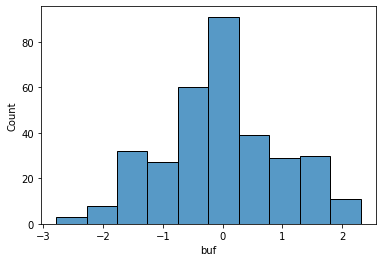

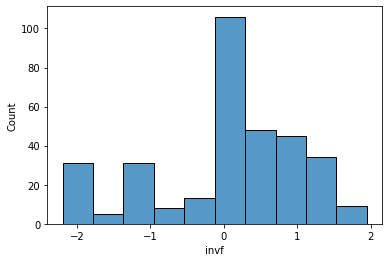

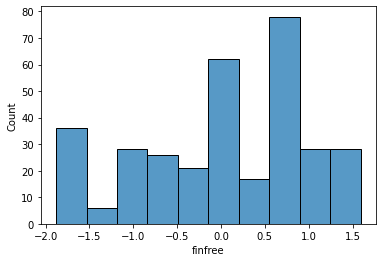

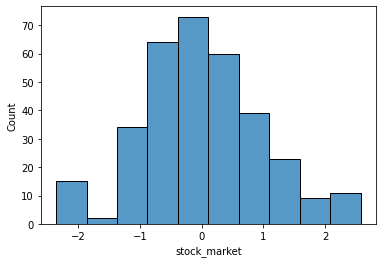

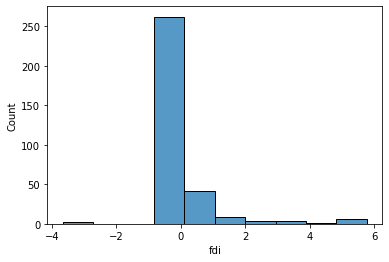

In [94]:
def numericals_plot2(df):
    for i in df.columns:
        sns.histplot(x=i, data = df, bins=10);
        plt.show()
    
numericals_plot2(numeric_FDI3)


# correlation

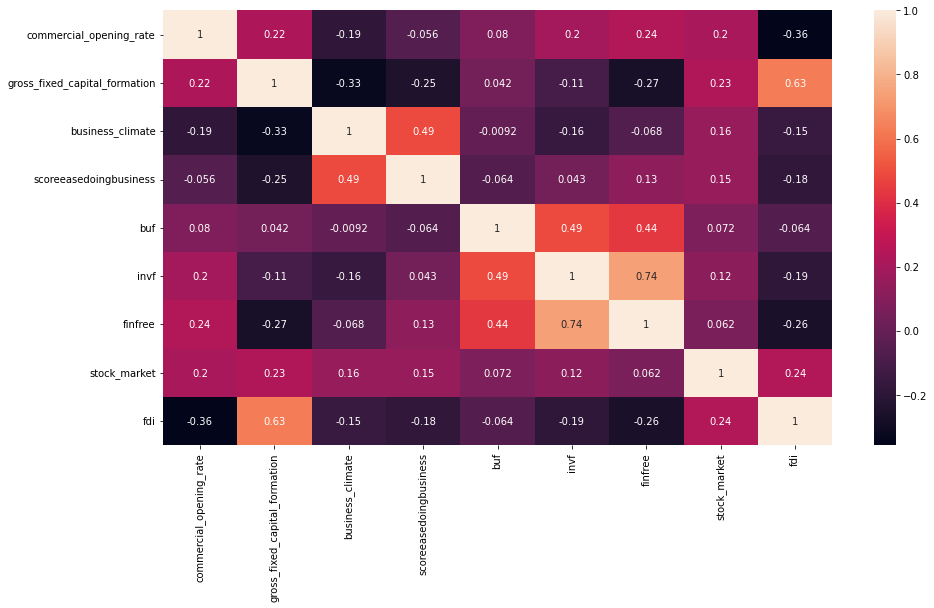

In [95]:
import seaborn as sb
dataplot=sb.heatmap(numeric_FDI3.corr(), annot=True,  )
plt.gcf().set_size_inches(15, 8)

In [96]:
#corr_FDI3 = numeric_FDI3[['fdi','gross_fixed_capital_formation','invf','finfree', 'stock market']].corr()
#corr_FDI3

 we have multicolinearity here with gross_fixed_capital_formation . We need to drop one of these columns. 
We will drop gross_fixed_capital_formation 

In [97]:
# we have multicolinearity here with gross_fixed_capital_formation . We need to drop one of these columns. 
# We will drop gross_fixed_capital_formation 

# numeric_FDI3 = numeric_FDI3.drop(['gross_fixed_capital_formation'], axis=1)

# Ploting fdi

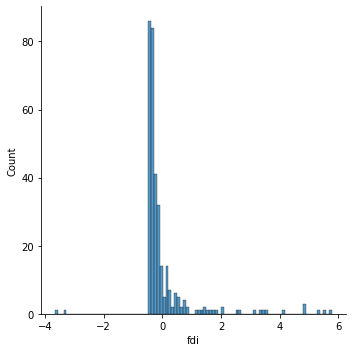

In [98]:
sns.displot(numeric_FDI3['fdi'])
plt.show()

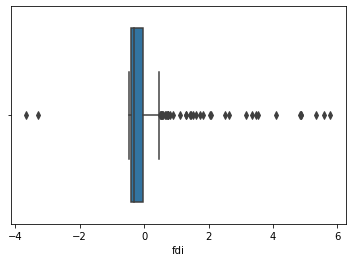

In [99]:
sns.boxplot(x=numeric_FDI3['fdi'])
plt.show()

In [100]:
iqr = np.percentile(numeric_FDI3['fdi'],75) - np.percentile(numeric_FDI3['fdi'],25)
upper_limit = np.percentile(numeric_FDI3['fdi'],75) + 1.5*iqr
lower_limit = np.percentile(numeric_FDI3['fdi'],25) - 1.5*iqr

In [101]:
numeric_FDI3 = numeric_FDI3[(numeric_FDI3['fdi']>lower_limit) & (numeric_FDI3['fdi']<upper_limit)]

In [102]:
# numeric_FDI3['fdi_log'] = np.log(numeric_FDI3['fdi']+1)

In [103]:
# sns.displot(numeric_FDI3['fdi_log'])

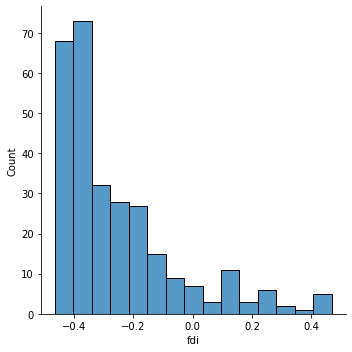

In [104]:
sns.displot(numeric_FDI3['fdi'])

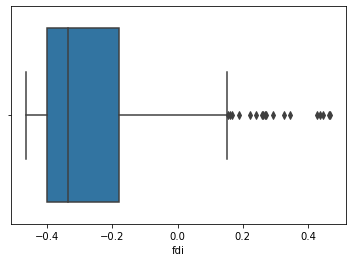

In [105]:
sns.boxplot(x=numeric_FDI3['fdi'])
plt.show()

In [106]:
#regression_line = lm.intercept_ + lm.coef_[0]*numeric_FDI3['stock market'] # b_0 + b_1 * x
#plt.plot(numeric_FDI3['stock market'], regression_line, c = 'orange')
#sns.scatterplot(x='stock market',y='fdi',data=numeric_FDI3)
#plt.show()

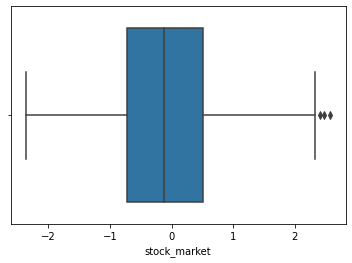

In [107]:
sns.boxplot(x=numeric_FDI3['stock_market'])
plt.show()

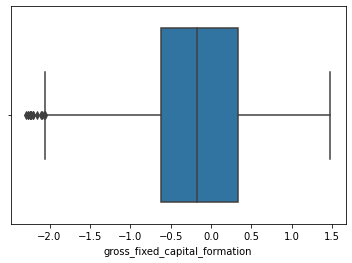

In [108]:
sns.boxplot(x=numeric_FDI3['gross_fixed_capital_formation'])
plt.show()

# split another variable

In [109]:
#y = numeric_FDI3['stock market']
#X = numeric_FDI3[['buf']] 

#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [110]:
from sklearn.preprocessing import MinMaxScaler

# PowerTransformer()
#MinMaxtransformer = MinMaxScaler()
#MinMaxtransformer.fit(X_train)

#X_train_scaled = MinMaxtransformer.transform(X_train)
#X_test_scaled  = MinMaxtransformer.transform(X_test)

#X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [111]:
#from sklearn import linear_model
#from sklearn.metrics import mean_squared_error, r2_score

#y = y_train
#X = X_train_scaled_df

#lm = linear_model.LinearRegression()
#lm.fit(X_train_scaled_df,y_train)
#print(lm.intercept_)
#print(lm.coef_)
#print(lm.score(X,y))

In [112]:
#from sklearn.metrics import r2_score

#y_pred_train = lm.predict(X_train_scaled_df)
#y_pred_test  = lm.predict(X_test_scaled_df)
#r2_score(y_train, y_pred_train)


#from sklearn.metrics import r2_score
#y_pred = lm.predict(X)
#r2_score(y, y_pred)

In [113]:
#fig, ax = plt.subplots(2,2,figsize=(20,10))
#sns.scatterplot(x=y_train, y=y_pred_train, ax = ax[0,0])
#sns.histplot(x=y_train-y_pred_train, ax = ax[0,1], bins = 50)
#ax[0,0].plot(y_train, y_train, color = "black")
#sns.scatterplot(x=y_test, y=y_pred_test, ax = ax[1,0])
#sns.histplot(x=y_test-y_pred_test, ax = ax[1,1], bins=50)
#ax[1,0].plot(y_test, y_test, color="black")
#plt.show()

# split

In [114]:
y = numeric_FDI3['fdi']
X = numeric_FDI3.drop(columns='fdi') 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

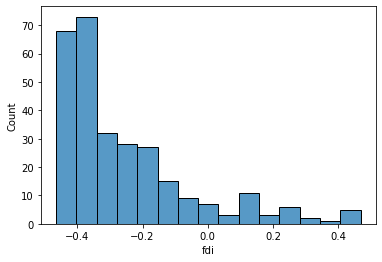

In [115]:
sns.histplot(y);

In [116]:
#y_powertransformer = PowerTransformer()
#y_powertransformer.fit(y)
#y_transformed = y_powertransformer.transform(y)
#y_transformed_s = pd.Series(y_transformed)

#y_powertransformer.inverse_transform(y_transformed_s)

#x_powertransformer = PowerTransformer()



# Normalization

In [117]:

from sklearn.preprocessing import MinMaxScaler

PowerTransformer()
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(X_train)

X_train_minmax_scaled = MinMaxtransformer.transform(X_train)
X_test_minmax_scaled  = MinMaxtransformer.transform(X_test)

X_train_minmax_scaled_df = pd.DataFrame(X_train_minmax_scaled, columns=X_train.columns)
X_test_minmax_scaled_df  = pd.DataFrame(X_test_minmax_scaled, columns=X_test.columns)

In [118]:
#from sklearn.preprocessing import PowerTransformer
#powertransformer = PowerTransformer()
#powertransformer.fit(X_train)
#print(powertransformer.lambdas_)

#X_train_scaled = powertransformer.transform(X_train)
#X_test_scaled  = powertransformer.transform(X_test)

#X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
#X_test_scaled_df  = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Let us have a look at the error rate for different k values

In [119]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
rmse_val = [] #to store rmse values for different k
knn_models = {}
for K in range(1,20):
    
    model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)
    model_knn.fit(X_train, y_train)  #fit the model
    
    knn_models[K] = model_knn 
    pred=model_knn.predict(X_test) #make prediction on test set
    error = (r2_score(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('r2_score value for k= ' , K , 'is:', error)

r2_score value for k=  1 is: 0.5766303392623823
r2_score value for k=  2 is: 0.6277387671252306
r2_score value for k=  3 is: 0.6348054004390093
r2_score value for k=  4 is: 0.6435863411057585
r2_score value for k=  5 is: 0.6446875765251456
r2_score value for k=  6 is: 0.6232701710061698
r2_score value for k=  7 is: 0.6140802794119726
r2_score value for k=  8 is: 0.6125965424701203
r2_score value for k=  9 is: 0.6214127463614698
r2_score value for k=  10 is: 0.6062796073293224
r2_score value for k=  11 is: 0.6045773585156056
r2_score value for k=  12 is: 0.603873904178654
r2_score value for k=  13 is: 0.5828346672872453
r2_score value for k=  14 is: 0.5672064235165888
r2_score value for k=  15 is: 0.5638260313591458
r2_score value for k=  16 is: 0.5425933675444918
r2_score value for k=  17 is: 0.5398198853511628
r2_score value for k=  18 is: 0.5173992366788662
r2_score value for k=  19 is: 0.5294525010963473


In [121]:
model_knn

KNeighborsRegressor(n_neighbors=19)

In [122]:
# Choose K=4
model_knn = neighbors.KNeighborsRegressor(n_neighbors = 4)
model_knn.fit(X_train, y_train)  #fit the model
    
knn_models[K] = model_knn 
pred_test=model_knn.predict(X_test) #make prediction on test set
pred_train=model_knn.predict(X_train) #make prediction on test set
print('r2_score_test: ', r2_score(y_test,pred_test))
print('r2_score_train: ', r2_score(y_train,pred_train))

r2_score_test:  0.6435863411057585
r2_score_train:  0.8567736659941534


In [226]:
# rmse_lm_test_KNN= sqrt(mean_squared_error(y_test,pred))
# print (rmse_lm_test_KNN)

In [227]:
# knn_models[K] = model_knn 
# pred=model_knn.predict(X_train) #make prediction on train set
# rmse_lm_train_KNN=sqrt(mean_squared_error(y_train,pred))
# print (rmse_lm_train_KNN)

In [123]:
r2_score_test_knn = r2_score(y_test,pred_test)

In [124]:
r2_score_train_knn = r2_score(y_train,pred_train)

In [151]:
matrix2= pd.DataFrame({'y_train': y_train, 'y_train_pred_lm': y_pred_train_lm, 'Residuals_train_lm': y_train - y_pred_train_lm, 'y_train_pred_knn': y_train_pred_knn, 'Residuals_train_knn':  y_train - y_train_pred_knn })

In [154]:
matrix2

,y_train,y_train_pred_lm,Residuals_train_lm,y_train_pred_knn,Residuals_train_knn
318,0.189559,0.008644,0.180915,0.083081,0.106478
264,-0.327345,-0.052517,-0.274828,-0.286120,-0.041225
240,-0.400243,-0.081447,-0.318795,-0.325489,-0.074754
249,-0.142671,-0.029094,-0.113577,-0.257884,0.115213
278,-0.350072,-0.037681,-0.312391,-0.336159,-0.013912
...,...,...,...,...,...
17,-0.199627,-0.077092,-0.122534,-0.256186,0.056559
13,-0.392647,-0.052859,-0.339788,-0.369492,-0.023155
11,-0.357331,-0.058347,-0.298983,-0.369492,0.012162
5,-0.426367,-0.093810,-0.332558,-0.418993,-0.007374


In [152]:
matrix= pd.DataFrame({'Model': ['model_lm', 'model_knn'], 'Train': [r2_score_train,r2_score_train_knn], 'Test': [r2_score_test, r2_score_test_knn]})


In [153]:
matrix

,Model,Train,Test
0,model_lm,0.654549,0.653463
1,model_knn,0.856774,0.643586


In [155]:
y_train - y_pred_train_lm

318    0.180915
264   -0.274828
240   -0.318795
249   -0.113577
278   -0.312391
         ...   
17    -0.122534
13    -0.339788
11    -0.298983
5     -0.332558
250   -0.290846
Name: fdi, Length: 203, dtype: float64

In [156]:
y_train - y_train_pred_knn

318    0.106478
264   -0.041225
240   -0.074754
249    0.115213
278   -0.013912
         ...   
17     0.056559
13    -0.023155
11     0.012162
5     -0.007374
250   -0.063215
Name: fdi, Length: 203, dtype: float64

In [71]:
y_train_pred_knn

array([-0.13009192, -0.42427708, -0.3466287 , -0.43071895, -0.44004462,
       -0.44004462, -0.38909847, -0.28658833,  0.33049093, -0.17860422,
       -0.30412957, -0.32386619, -0.33708532,  0.15146812, -0.41642149,
       -0.38067653,  0.21608705, -0.37069947, -0.38884856,  0.03249803,
       -0.31262484,  0.05058064, -0.08554325, -0.43248666, -0.43248666,
       -0.15979694, -0.41418535, -0.11708436, -0.41642149, -0.24836472,
       -0.37369963, -0.37981699,  0.10240295, -0.38877694, -0.260517  ,
       -0.2861857 ,  0.11667885, -0.30936047, -0.24042109, -0.25505648,
       -0.2230325 , -0.2861857 , -0.30097727,  0.24083258, -0.17075657,
       -0.42758189,  0.11650634,  0.21928258, -0.46396514, -0.40122344,
       -0.32953939, -0.389763  , -0.37369963, -0.2849105 , -0.21267904,
       -0.31262484, -0.46033327, -0.23999649, -0.33671746, -0.39241863,
       -0.32106226, -0.05719572, -0.00795643, -0.2034401 , -0.29969153,
       -0.3896851 , -0.11708436, -0.46033327, -0.11816691, -0.21

In [157]:
y_train

318    0.189559
264   -0.327345
240   -0.400243
249   -0.142671
278   -0.350072
         ...   
17    -0.199627
13    -0.392647
11    -0.357331
5     -0.426367
250   -0.321099
Name: fdi, Length: 203, dtype: float64

In [158]:
pred_X_test_knn=model_knn.predict(X_test) #make prediction on test set
print (pred_X_test_knn)

[-0.41729136 -0.43055774 -0.30169055 -0.13560544 -0.35977027  0.14789916
 -0.36135982 -0.40359831 -0.22756817 -0.13775322 -0.35249514 -0.28950746
 -0.4354099  -0.1691305  -0.14285765 -0.31367868 -0.09019359 -0.201612
  0.15367473 -0.28435973 -0.43417021 -0.42102579 -0.33459284 -0.31173969
 -0.35949082  0.0228981  -0.33236901 -0.36066791 -0.37826249  0.25769411
 -0.4314782  -0.35949082  0.04550951 -0.3732225  -0.35884871 -0.33292499
 -0.27937337 -0.2599831  -0.38815942 -0.31816716 -0.39376098 -0.26607751
 -0.31144969 -0.4277105  -0.38304631 -0.36983906 -0.36369753 -0.37898849
 -0.11732491  0.00231263 -0.38305224 -0.4189151  -0.22756817 -0.29433684
 -0.36064943 -0.42850759 -0.37315996 -0.20690969 -0.3512208  -0.12808358
  0.15367473 -0.35249514 -0.38988524 -0.4277105  -0.29433684 -0.22756817
 -0.27937337 -0.37607151 -0.27151774 -0.27274753 -0.40355661 -0.35117604
  0.08308063  0.01823547 -0.39777053 -0.42102579 -0.2078731  -0.23331581
 -0.39376098 -0.40305089 -0.1049233  -0.4354099  -0.2

In [129]:

pred_X_train_knn=model_knn.predict(X_train) #make prediction on test set
print (pred_X_train_knn)

[ 0.08308063 -0.28611974 -0.32548894 -0.25788395 -0.33615939 -0.00695621
 -0.35249514 -0.29958585 -0.38329568 -0.10933701  0.00231263 -0.273066
  0.15367473 -0.45327683 -0.41241385 -0.45327683 -0.36983906 -0.41979343
 -0.39121118 -0.33494925 -0.42732975  0.15367473 -0.42850759 -0.2599831
 -0.35540347 -0.28201098 -0.42826305 -0.21876136 -0.39376098 -0.18197233
 -0.38864403 -0.39578965 -0.39135374 -0.29433684 -0.43319884 -0.40484984
 -0.27770387 -0.35249514 -0.42724365 -0.12808358  0.12241757 -0.29958585
 -0.45009507 -0.45009507 -0.29489232 -0.1691305   0.0228981  -0.32506902
 -0.40484984 -0.36934073 -0.32190992 -0.36598916 -0.19674493 -0.14881799
 -0.29489232 -0.38719305 -0.1691305  -0.33292499 -0.36949248 -0.10136238
 -0.36064943  0.15691453 -0.42102579 -0.2486211   0.36419983 -0.3631341
 -0.36983906  0.25769411 -0.19674493 -0.38593383 -0.36064943 -0.40355661
 -0.28276419 -0.17687988 -0.33878506 -0.27937337 -0.17280745 -0.00695621
 -0.341699   -0.39537251 -0.35146271 -0.41729136 -0.404

# plotting the rmse values against k values


<AxesSubplot:>

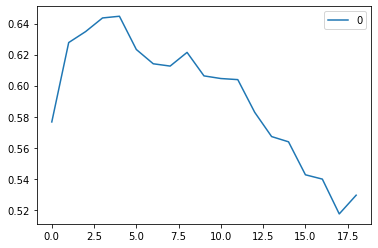

In [130]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

ValueError: x and y must have same first dimension, but have shapes (13,) and (1,)

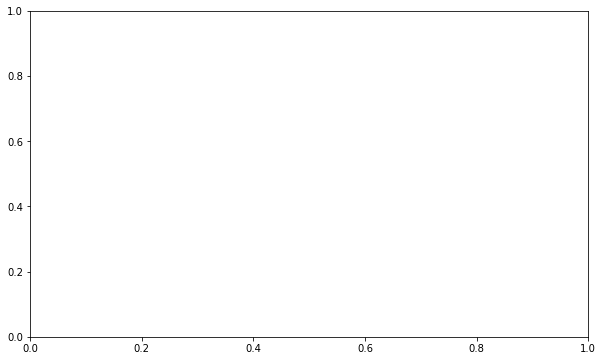

In [131]:
plt.figure(figsize=(10,6))
plt.plot(range(2,15),error,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('r2_score vs. k value')
plt.xticks(range(1,16))
plt.xlabel('K')
plt.ylabel('RMSE')

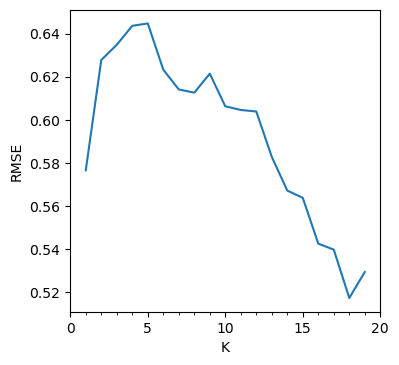

In [132]:
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(4,4), dpi = 100)
ax.plot(list(range(1,20)),rmse_val);
ax.set_xlim(0,20)
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlabel("K")
ax.set_ylabel("RMSE")
plt.show()

In [159]:
y_test_pred_knn = knn_models[4].predict(X_test)
print (y_test_pred_knn)

[-0.41729136 -0.43055774 -0.30169055 -0.13560544 -0.35977027  0.14789916
 -0.36135982 -0.40359831 -0.22756817 -0.13775322 -0.35249514 -0.28950746
 -0.4354099  -0.1691305  -0.14285765 -0.31367868 -0.09019359 -0.201612
  0.15367473 -0.28435973 -0.43417021 -0.42102579 -0.33459284 -0.31173969
 -0.35949082  0.0228981  -0.33236901 -0.36066791 -0.37826249  0.25769411
 -0.4314782  -0.35949082  0.04550951 -0.3732225  -0.35884871 -0.33292499
 -0.27937337 -0.2599831  -0.38815942 -0.31816716 -0.39376098 -0.26607751
 -0.31144969 -0.4277105  -0.38304631 -0.36983906 -0.36369753 -0.37898849
 -0.11732491  0.00231263 -0.38305224 -0.4189151  -0.22756817 -0.29433684
 -0.36064943 -0.42850759 -0.37315996 -0.20690969 -0.3512208  -0.12808358
  0.15367473 -0.35249514 -0.38988524 -0.4277105  -0.29433684 -0.22756817
 -0.27937337 -0.37607151 -0.27151774 -0.27274753 -0.40355661 -0.35117604
  0.08308063  0.01823547 -0.39777053 -0.42102579 -0.2078731  -0.23331581
 -0.39376098 -0.40305089 -0.1049233  -0.4354099  -0.2

In [135]:
y_train_pred_knn = knn_models[4].predict(X_train)
print (y_train_pred_knn)

[ 0.08308063 -0.28611974 -0.32548894 -0.25788395 -0.33615939 -0.00695621
 -0.35249514 -0.29958585 -0.38329568 -0.10933701  0.00231263 -0.273066
  0.15367473 -0.45327683 -0.41241385 -0.45327683 -0.36983906 -0.41979343
 -0.39121118 -0.33494925 -0.42732975  0.15367473 -0.42850759 -0.2599831
 -0.35540347 -0.28201098 -0.42826305 -0.21876136 -0.39376098 -0.18197233
 -0.38864403 -0.39578965 -0.39135374 -0.29433684 -0.43319884 -0.40484984
 -0.27770387 -0.35249514 -0.42724365 -0.12808358  0.12241757 -0.29958585
 -0.45009507 -0.45009507 -0.29489232 -0.1691305   0.0228981  -0.32506902
 -0.40484984 -0.36934073 -0.32190992 -0.36598916 -0.19674493 -0.14881799
 -0.29489232 -0.38719305 -0.1691305  -0.33292499 -0.36949248 -0.10136238
 -0.36064943  0.15691453 -0.42102579 -0.2486211   0.36419983 -0.3631341
 -0.36983906  0.25769411 -0.19674493 -0.38593383 -0.36064943 -0.40355661
 -0.28276419 -0.17687988 -0.33878506 -0.27937337 -0.17280745 -0.00695621
 -0.341699   -0.39537251 -0.35146271 -0.41729136 -0.404

# Plotting with KNN regression

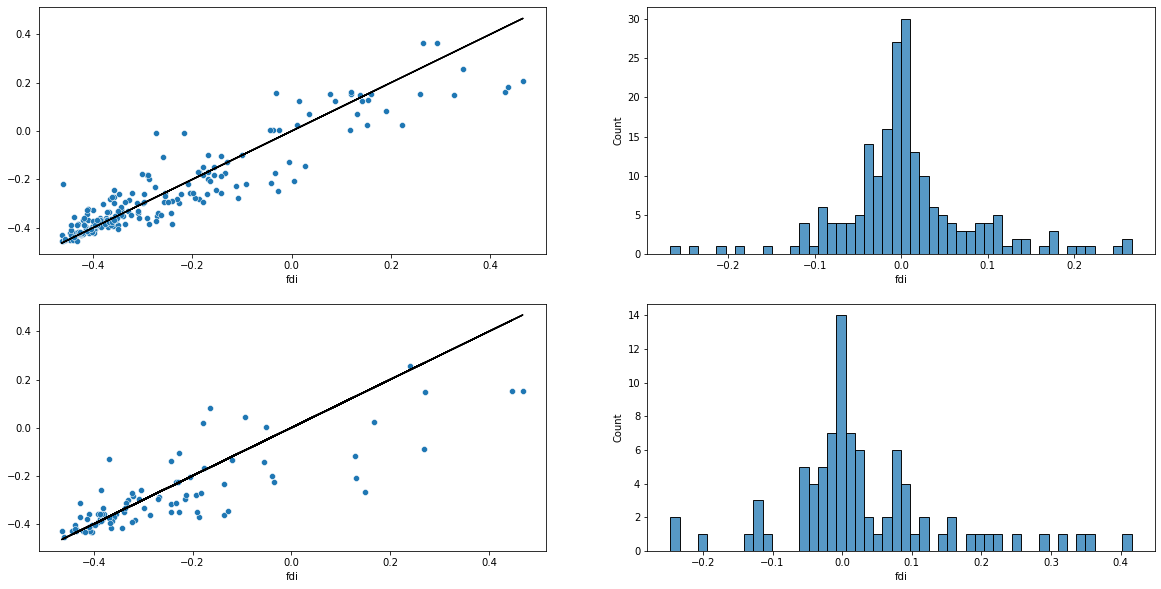

In [136]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x=y_train, y=y_train_pred_knn, ax = ax[0,0])
sns.histplot(x=y_train-y_train_pred_knn, ax = ax[0,1], bins = 50)
ax[0,0].plot(y_train, y_train, color = "black")
sns.scatterplot(x=y_test, y=y_test_pred_knn, ax = ax[1,0])
sns.histplot(x=y_test-y_test_pred_knn, ax = ax[1,1], bins=50)
ax[1,0].plot(y_test, y_test, color="black")
plt.show()

In [ ]:
#metrics = pd.DataFrame({'Model': ['Linear Model', 'K-NN'], 'Train': ['RMSE_LM','RMSE_KNN'], 'Test': ['RMSE_LM', 'RMSE_KNN']})

In [ ]:
#pd.DataFrame{'y_train': y_train, 'y_train_pred_lm': y_train_pred_lm, 'Residuals_train_lm': y_train - y_train_pred_lm, 'y_train_pred_knn': y_train_pred_knn, 'Residuals_train_knn': }

# Predictions on the test dataset

In [ ]:
#from sklearn.neighbors import KNeighborsRegressor
#neigh = KNeighborsRegressor(n_neighbors=1)
#neigh.fit(X, y)
#KNeighborsRegressor(n_neighbors=2)
#print(neigh.predict([[1.5]]))


# lm regression

In [137]:


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = y_train
X = X_train

model_lm = linear_model.LinearRegression()
model_lm.fit(X_train,y_train)
print(model_lm.intercept_)
print(model_lm.coef_)
print(model_lm.score(X,y))

-0.2267956091765536
[ 0.01478203  0.18322635  0.07856044 -0.00229247  0.0208721  -0.02817038
  0.03628236  0.01548879]
0.6545491680488735


In [138]:
model_lm

LinearRegression()

In [139]:
X_train.describe()

,commercial_opening_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,0.046611,-0.225361,0.097597,0.087058,0.023140,0.024908,0.098602,-0.048445
std,0.721053,0.849574,0.999381,1.041409,0.981163,0.976559,0.991671,1.034293
min,-1.371351,-2.293179,-2.349406,-2.735960,-2.780774,-2.198074,-1.879919,-2.355461
25%,-0.455350,-0.664991,-0.598959,-0.634833,-0.643083,-0.106297,-0.445604,-0.695551
50%,0.022737,-0.167822,0.052720,0.063871,-0.000925,0.056725,-0.005062,-0.109380
75%,0.479890,0.333627,0.847710,0.824959,0.620859,0.683041,0.742700,0.574470
max,3.059378,1.479084,1.870386,2.349911,2.238813,1.950404,1.591057,2.573010


# we train/fit our model and evaluate it

In [140]:
from sklearn.metrics import r2_score

y_pred_train = model_lm.predict(X_train_minmax_scaled)
y_pred_test  = model_lm.predict(X_test_minmax_scaled)
r2_score(y_train, y_pred_train)


from sklearn.metrics import r2_score
y_pred = model_lm.predict(X)
r2_score_train= r2_score(y, y_pred)
print (r2_score_train)


0.6545491680488735


C:\Users\NON\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\NON\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [141]:
print(round(model_lm.intercept_,1))
print(model_lm.coef_.round(1))
print("r^2: ",round(model_lm.score(X_train_minmax_scaled,y_train),2))

-0.2
[ 0.   0.2  0.1 -0.   0.  -0.   0.   0. ]
r^2:  -0.71


C:\Users\NON\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [142]:
y_pred_train_lm = model_lm.predict(X_train_minmax_scaled)
print(y_pred_train_lm )

[ 0.00864396 -0.05251733 -0.08144713 -0.02909352 -0.03768106 -0.00805891
 -0.04325325 -0.06412779 -0.07459293 -0.03114739  0.01390061 -0.03389659
  0.02996763 -0.11179753 -0.06261387 -0.12522428 -0.07033946 -0.11582187
 -0.06594618 -0.04531799 -0.1094747   0.03505231 -0.1100729  -0.05663032
 -0.05076947 -0.02533987 -0.15852442 -0.04384531 -0.08380058 -0.00205377
 -0.09427493 -0.08049327 -0.09641031 -0.03634617 -0.14655422 -0.06883273
 -0.06272401 -0.05958581 -0.11444233 -0.02163273 -0.00205848 -0.07550861
 -0.10500206 -0.10001073 -0.05697147 -0.03056036  0.00781585 -0.05559599
 -0.06492523 -0.06135591 -0.07266543 -0.06148871 -0.02020034 -0.00061031
 -0.0588427  -0.06013194 -0.02466442 -0.06498969 -0.05331441 -0.01845484
 -0.06327419  0.0246237  -0.09946599 -0.08540746  0.03258752 -0.07004635
 -0.07990885  0.02689424 -0.02206309 -0.0867709  -0.05208591 -0.10890703
 -0.08995682  0.01376574 -0.08390045 -0.0438987  -0.03927507  0.00724686
 -0.07768848 -0.06130708 -0.08216828 -0.12437317 -0

C:\Users\NON\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [143]:
y_pred_test_lm  = model_lm.predict(X_test_minmax_scaled)
print (y_pred_test_lm)

[-0.12036431 -0.10751828 -0.05039596 -0.00420944 -0.04962557  0.02303083
 -0.01261248 -0.06501775 -0.03314177 -0.03223514 -0.04265627 -0.03225256
 -0.11470496 -0.02856275 -0.01362738 -0.04806162  0.01345901  0.00049603
  0.03222017 -0.05205703 -0.11713523 -0.10391425 -0.07551542 -0.09022823
 -0.08229104  0.00908516 -0.08185165 -0.08036837 -0.07137685  0.02617584
 -0.16051241 -0.07718561  0.01324032 -0.06732331 -0.06866217 -0.07519199
 -0.06066945 -0.05168675 -0.07265066 -0.04874833 -0.08599135  0.01206303
 -0.05636542 -0.11464261 -0.0828753  -0.08003154 -0.07823466 -0.05736656
  0.01809548  0.01687071 -0.08591365 -0.13625204 -0.03010853 -0.03588977
 -0.05864599 -0.10575359 -0.00817651 -0.05002364 -0.05695262 -0.01798535
  0.03140142 -0.04441892 -0.07855597 -0.11186875 -0.03504524 -0.02778315
 -0.05571309 -0.06169194 -0.03086483 -0.03917389 -0.13459124 -0.04640584
  0.01825347  0.00856624 -0.06902882 -0.10737492  0.00918873 -0.0662506
 -0.07704147 -0.06449697 -0.00419223 -0.1056472  -0.

C:\Users\NON\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


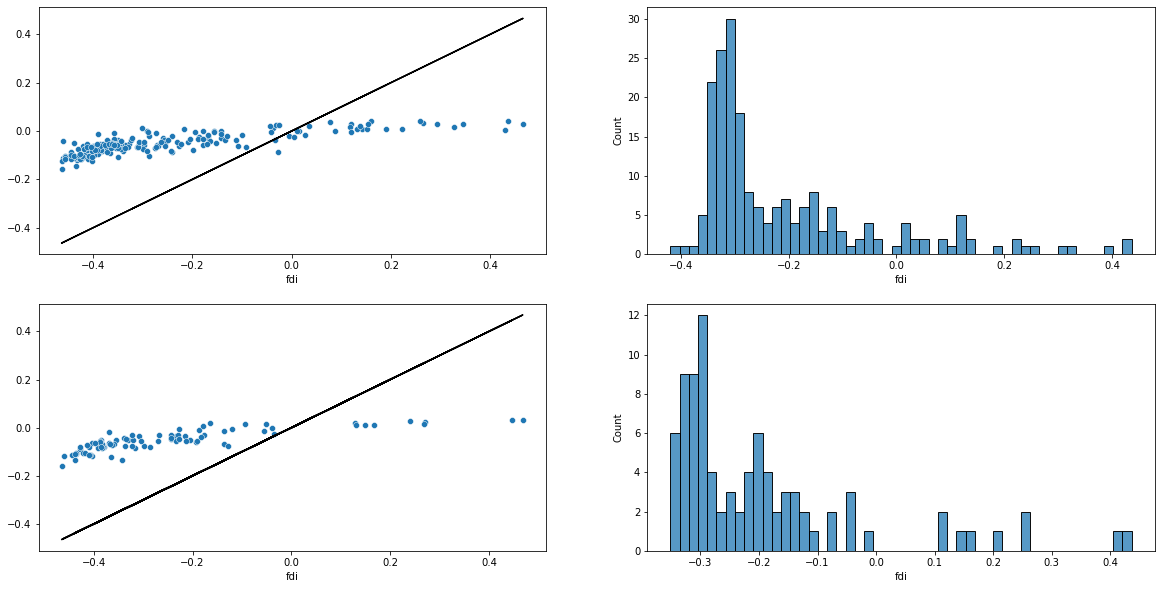

In [144]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.scatterplot(x=y_train, y=y_pred_train, ax = ax[0,0])
sns.histplot(x=y_train-y_pred_train, ax = ax[0,1], bins = 50)
ax[0,0].plot(y_train, y_train, color = "black")
sns.scatterplot(x=y_test, y=y_pred_test, ax = ax[1,0])
sns.histplot(x=y_test-y_pred_test, ax = ax[1,1], bins=50)
ax[1,0].plot(y_test, y_test, color="black")
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

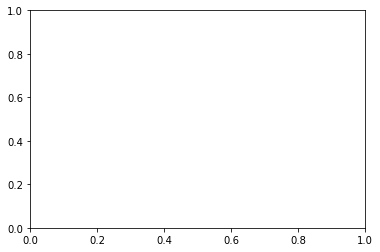

In [80]:
fig, ax = plt.subplots()
sns.scatterplot(X_train_minmax_scaled['gross_fixed_capital_formation'].values,y_train)
plt.show()

# Evaluation of the TEST portion of the data, that we did not use for training.

In [160]:
y_pred_test = model_lm.predict(X_test)
r2_score_test = r2_score(y_test, y_pred_test)
print (r2_score_test)

0.6534633311601568


In [ ]:
#regression_line = lm.intercept_ + lm.coef_[0]*numeric_FDI3['stock market'] # b_0 + b_1 * x
#plt.plot(numeric_FDI3['stock market'], regression_line, c = 'orange')
#sns.scatterplot(x='stock market',y='fdi',data=numeric_FDI3)
#plt.show()

In [169]:
print(model_lm.intercept_)   
print(model_lm.coef_[0])

-0.2267956091765536
0.014782030890494978


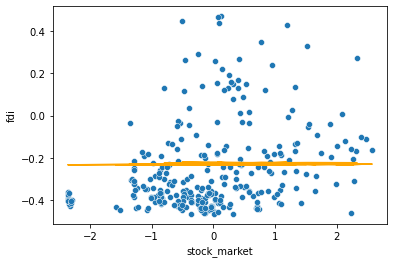

In [172]:
regression_line = model_lm.intercept_ + model_lm.coef_[0]*numeric_FDI3['fdi']   #b_0 + b_1 * x
plt.plot(numeric_FDI3['stock_market'], regression_line, c = 'orange')
sns.scatterplot(x='stock_market',y='fdi',data=numeric_FDI3)
plt.show()

# Checking linearity

# checking relation

In [162]:
import scipy.stats as st

In [163]:
numeric_FDI3

,commercial_opening_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi
0,0.091316,-0.774379,-1.417695,0.661596,-1.440617,-0.106297,1.591057,-1.081706,-0.444693
1,0.305318,-0.707284,-1.895417,0.661596,-1.440617,-0.106297,1.591057,-1.580889,-0.431908
2,0.414890,-0.639883,-1.055946,0.661596,0.198081,0.896537,1.591057,-1.517545,-0.444369
3,0.480856,-0.590864,-2.088493,0.661596,0.175398,0.387938,0.742700,-1.061439,-0.436306
4,0.455876,-0.524810,-2.399586,0.661596,-0.038130,0.387938,0.742700,-0.943724,-0.410158
...,...,...,...,...,...,...,...,...,...
325,0.022737,1.021005,1.063682,2.190009,-0.540268,0.221498,0.232769,-0.402052,-0.043602
326,0.012928,1.072169,0.840255,1.490001,-0.540268,0.221498,-0.005062,-0.470490,0.116868
327,0.009179,1.084916,0.876499,1.092581,-0.331803,0.896537,1.014495,-0.567819,-0.026669
328,0.011055,1.130210,0.759630,0.973696,-1.226457,-0.583853,-0.838003,-0.274145,-0.093661


In [165]:
matrix_donors = numeric_FDI3['fdi']
matrix_donors

0     -0.444693
1     -0.431908
2     -0.444369
3     -0.436306
4     -0.410158
         ...   
325   -0.043602
326    0.116868
327   -0.026669
328   -0.093661
329   -0.051258
Name: fdi, Length: 290, dtype: float64

In [166]:

FDI4 = pd.crosstab(numeric_FDI3['stock_market'] , numeric_FDI3['fdi'], margins = False)
FDI4

fdi,-0.465033,-0.463561,-0.463301,-0.460892,-0.459917,-0.459837,-0.457060,-0.456806,-0.456438,-0.447075,...,0.268795,0.271531,0.291692,0.326676,0.345767,0.429047,0.436222,0.447487,0.465327,0.468611
stock_market,,,,,,,,,,,,,,,,,,,,,
-2.359208,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.355461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.355391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.353515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-2.351350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.312726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.328118,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2.399625,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# compute chi2 

In [167]:
st.chi2_contingency(FDI4)

(83810.0,
 0.23949637231211704,
 83521,
 array([[0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        ...,
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828],
        [0.00344828, 0.00344828, 0.00344828, ..., 0.00344828, 0.00344828,
         0.00344828]]))

# CHEcKING Multicollinearity and  Variance Inflation Factor

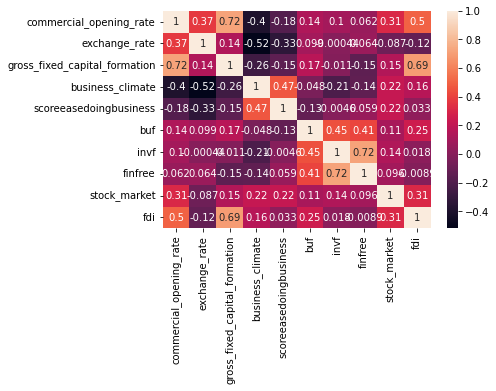

In [90]:
sns.heatmap(numeric_FDI3.corr(), annot=True)
plt.show()

#we suspect that fdi correlated with the other

In [102]:
numeric_FDI3['total'] = numeric_FDI3['commercial_opening_rate'] +numeric_FDI3['gross_fixed_capital_formation'] +numeric_FDI3['business_climate'] +numeric_FDI3['scoreeasedoingbusiness'] +numeric_FDI3['buf'] +numeric_FDI3['invf']+numeric_FDI3['finfree']+numeric_FDI3['stock_market'] 
numeric_FDI3.head()

,commercial_opening_rate,exchange_rate,gross_fixed_capital_formation,business_climate,scoreeasedoingbusiness,buf,invf,finfree,stock_market,fdi,total
0,0.091316,0.587494,-0.774379,-1.417695,0.661596,-1.440617,-0.106297,1.591057,-1.081706,-0.444693,-2.476724
1,0.305318,0.619904,-0.707284,-1.895417,0.661596,-1.440617,-0.106297,1.591057,-1.580889,-0.431908,-3.172532
2,0.414890,0.648266,-0.639883,-1.055946,0.661596,0.198081,0.896537,1.591057,-1.517545,-0.444369,0.548787
3,0.480856,0.647921,-0.590864,-2.088493,0.661596,0.175398,0.387938,0.742700,-1.061439,-0.436306,-1.292307
4,0.455876,0.646282,-0.524810,-2.399586,0.661596,-0.038130,0.387938,0.742700,-0.943724,-0.410158,-1.658141


In [93]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [94]:
y = numeric_FDI3['fdi']
X = numeric_FDI3[['commercial_opening_rate','gross_fixed_capital_formation','business_climate','scoreeasedoingbusiness','buf','invf','finfree','stock_market']] 
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [103]:
KNN = model_knn.fit(X_train, y_train)

In [104]:
y_pred = model_knn.predict(X_test)

In [105]:
r2_score(y_pred,y_test)

0.43400252072584566